# Modelling

## Notebook Summary

Linear Model Implementation

## Notebook Setup

In [24]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading sklearn functionality
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression

# Set global random seed for reproducibility
random_seed_val = 42
np.random.seed(random_seed_val)

## Data Loading & Understanding

In [25]:
# Creating DataFrame
pp_house_df = pd.read_csv("london_house_price_data_pp.csv")
# Viewing DataFrame
pp_house_df.head(5)

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_currentPrice,...,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow,currentEnergyRating_encoded
0,51.495505,-0.132379,2.0,2.0,71.0,1.0,2650.0,2950.0,3250.0,759000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,51.478185,-0.092201,1.0,1.0,64.0,1.0,1850.0,2000.0,2100.0,388000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,51.588774,-0.139599,1.0,4.0,137.0,2.0,4350.0,4850.0,5350.0,1261000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,51.466089,0.006967,1.0,2.0,97.0,1.0,3150.0,3500.0,3850.0,944000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,51.451327,-0.007569,1.0,3.0,135.0,2.0,2550.0,2800.0,3050.0,726000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [26]:
# Columns and data types
pp_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   latitude                                   265911 non-null  float64
 1   longitude                                  265911 non-null  float64
 2   bathrooms                                  265911 non-null  float64
 3   bedrooms                                   265911 non-null  float64
 4   floorAreaSqM                               265911 non-null  float64
 5   livingRooms                                265911 non-null  float64
 6   rentEstimate_lowerPrice                    265911 non-null  float64
 7   rentEstimate_currentPrice                  265911 non-null  float64
 8   rentEstimate_upperPrice                    265911 non-null  float64
 9   saleEstimate_currentPrice                  265911 non-null  float64
 10  saleEsti

In [27]:
pp_house_df.shape

(265911, 37)

## Preparing Data

In [28]:
# Seperating features from target
X = pp_house_df.drop('saleEstimate_currentPrice', axis=1)
y = pp_house_df['saleEstimate_currentPrice']

In [29]:
# Remainder test split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed_val)

# Train validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_remainder, y_remainder, test_size=0.20, random_state=random_seed_val)

# Checking size of split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}") 
print(f"Test set size: {len(X_test)}")

Training set size: 170182
Validation set size: 42546
Test set size: 53183


## Modelling

### Linear Regression 

The performance of this simple linear model will be used as a baseline for future linear models for comparison. Default parameters used, no tuning required.

In [30]:
# Defining model
lin_reg_model = LinearRegression()

# Fitting model
lin_reg_model.fit(X_train, y_train)

# Scoring on train
train_score = lin_reg_model.score(X_train, y_train)

# Scoring on validation
valid_score = lin_reg_model.score(X_valid, y_valid)

# Print performance
print(f"R^2 value for the training set is {train_score} and R^2 value for the validation set is {valid_score}")


R^2 value for the training set is 0.9936177467987773 and R^2 value for the validation set is 0.9938623405243856


## Ridge Regression

Implementing Ridge regression with varying values for alpha, to tune hyperparameter. Examining which values of alpha show the best performance on the model.

In [31]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_train_score = []
ridge_valid_score = []

for alpha in alpha_values:
    # Instantiate model with alpha value
    ridge_model = Ridge(alpha=alpha)

    # Fit model
    ridge_model.fit(X_train, y_train)

    # Scores
    train_score_val = ridge_model.score(X_train, y_train)
    valid_score_val = ridge_model.score(X_valid, y_valid)

    # Storing
    ridge_train_score.append(train_score_val)
    ridge_valid_score.append(valid_score_val)



c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.73933e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.73931e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.73916e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.73767e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\env

In [32]:
print(ridge_valid_score)

[0.9938623404723221, 0.9938623400028634, 0.9938623352949851, 0.993862287037255, 0.9938617602028159, 0.9938571398227714]


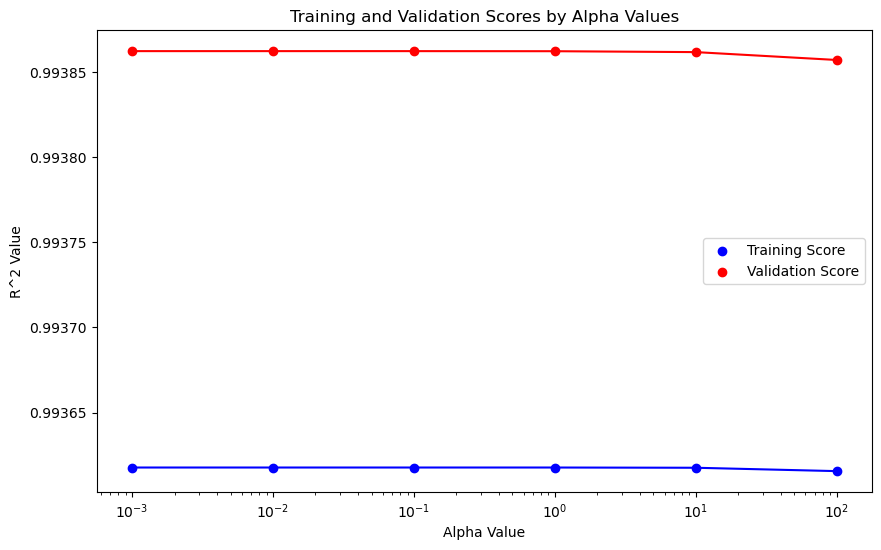

In [33]:
# Plotting scores against alpha

# Creating scatter plot with two lines
plt.figure(figsize=(10, 6))
plt.scatter(alpha_values, ridge_train_score, color='blue', label='Training Score')
plt.scatter(alpha_values, ridge_valid_score, color='red', label='Validation Score')
plt.plot(alpha_values, ridge_train_score, color='blue')
plt.plot(alpha_values, ridge_valid_score, color='red')

# Logarithmic scale for the x-axis
plt.xscale('log')

# Labels and Title
plt.xlabel('Alpha Value')
plt.ylabel('R^2 Value')
plt.title('Training and Validation Scores by Alpha Values')
plt.legend()

# Show plot
plt.show()
